In [1]:
import numpy as np
from numpy.random import seed, normal, shuffle
from numpy import cos, sin
import matplotlib.pyplot as plt

In [61]:
def transform_data_rad(data, radius):
    out_data = np.zeros_like(data)
    for ix, (x, y) in enumerate(data):
        transformed = radius * cos(ix) + x/10, radius * sin(ix) + y/10
        out_data[ix, :] = transformed
        
    return out_data

def transform_data_group(data, mean):
    return data + mean

def make_sample_data(transform, nsamples, ndim, target_col, *args, **kwargs):
    """
    Create data for a binary classification problem under a given transormation function
    """
    noise = normal(size=(nsamples, ndim))
    inputs = transform(noise, *args, **kwargs)
    target = np.zeros((nsamples, 2))
    target[:, target_col] = 1
    
    return inputs, target

def group_samples(input1, input2, target1, target2, set_seed=None):
    seed(set_seed)
    inputs = np.append(inputs1, inputs2, axis=0)
    targets = np.append(target1, target2, axis=0)
    data = [(input.reshape(-1, 1), target.reshape(-1, 1))
            for input, target in zip(inputs, targets)]
    shuffle(data)
    return data

In [53]:
input1, target1 = make_sample_data(transform_data_rad, 2000, 2, 0, radius=0.7)
input2, target2 = make_sample_data(transform_data_rad, 2000, 2, 1, radius=0.4)
data = group_samples(input1, input2, target1, target2, set_seed=1643)

In [66]:
input1, target1 = make_sample_data(transform_data_group, 2000, 2, 0, mean=0.7)
input2, target2 = make_sample_data(transform_data_group, 2000, 2, 1, mean=-0.6)
data = group_samples(input1, input2, target1, target2, set_seed=1643)

In [67]:
train_data = data[800:]
test_data = data[:800]

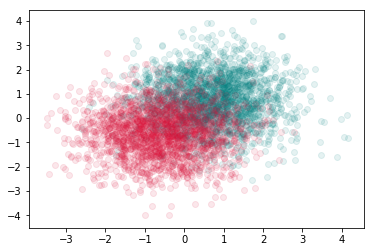

In [68]:
plt.scatter(*input1.T, alpha=0.1, c="teal")
plt.scatter(*input2.T, alpha=0.1, c="crimson")
plt.show()

In [8]:
import pickle
with open("train.pkl", "wb") as file:
    pickle.dump(train_data, file)
    
with open("test.pkl", "wb") as file:
    pickle.dump(test_data, file)

In [69]:
from neural import NNet
net = NNet([2, 3, 3, 2])
net.SGD(train_data, 100, 20, 1, test_data=test_data)

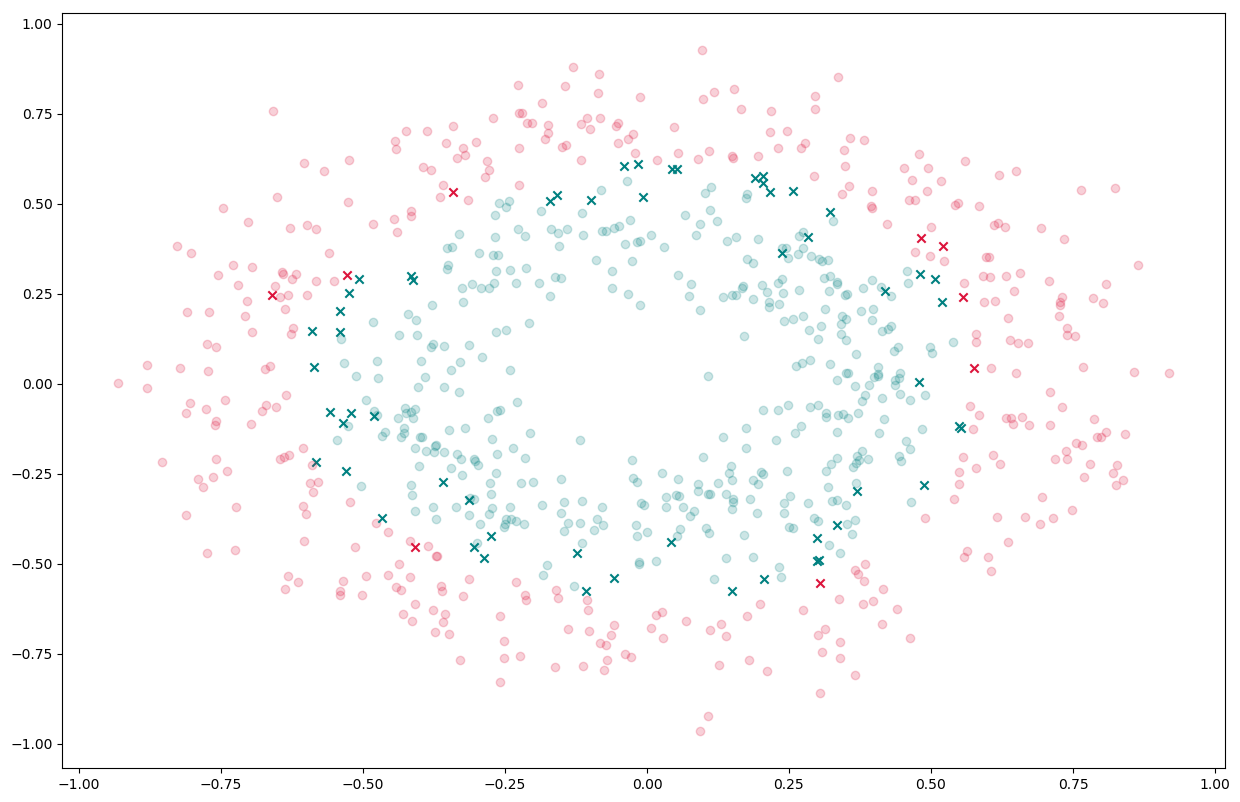

In [60]:
vals = [(x, np.argmax(net.forwardpropagate(x)), np.argmax(y)) for x,y in test_data]

plt.figure(figsize=(15,10), dpi=100)
for datum, pred, real in vals:
    # Predicted value
    if pred == real:
        alpha = 0.2
        marker = "o"
        c = "teal" if pred == 1 else "crimson"
    else:
        alpha = 1
        marker = "x"
        # Predicted 1st class, but wasn't, or
        # predicted 2nd class, but wasn't
        c = "teal" if pred == 1 else "crimson"
    plt.scatter(*datum, c=c, alpha=alpha, marker=marker)
plt.show()    